In [1]:
using LinearAlgebra 
using Kronecker
using Plots
using Distributions

In [4]:
X = [0 1 ; 1 0 ];
Y = [0 -1im ; im 0 ];
Z = [1 0 ; 0 -1 ];


H=1/sqrt(2)*[1 1 ; 1 -1];

S=[1 0; 0 im];
T=[1 0; 0 exp(im*pi/4)];



function RX(r)
    exp(-im*r/2*X)
end

function RY(r)
    exp(-im*r/2*Y)
end

function RZ(r)
    exp(-im*r/2*Z)
end


CNOT=[1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0];
REVCNOT=kronecker(H, H)*CNOT*kronecker(H, H);





o=pi/4;
XRow=copy(kronecker(RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o)))
ZRow=copy(kronecker(RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o)));
UOdd=copy(kronecker(CNOT,CNOT,CNOT,CNOT,CNOT,CNOT))
UEven=copy(kronecker(I(2),CNOT,CNOT,CNOT,CNOT,CNOT,I(2)));


A=copy(XRow*ZRow*UEven*ZRow*XRow*ZRow*UOdd*ZRow);


In [5]:


EigA=eigvals(A);



In [6]:
N=fill(0.1,length(EigA))


for i in 1:length(EigA)
    N[i]=real(log(EigA[i])/(-im));
end

N= sort(N,rev=true)

4096-element Vector{Float64}:
  3.1400882007063204
  3.1377767964496885
  3.1370294654278097
  3.1366102331371772
  3.134299114102543
  3.1322138345226143
  3.1295553457487233
  3.1282078775035447
  3.1257047264982547
  3.1246417957327846
  3.122881159535954
  3.1226564489394333
  3.1205921654701765
  ⋮
 -3.124071121682844
 -3.12581869626382
 -3.1287453721616414
 -3.1307372737652632
 -3.1315724287874183
 -3.131784438475361
 -3.13405970173786
 -3.1350436495540253
 -3.136927752236932
 -3.1379578377449073
 -3.1396945795113362
 -3.1405531406349105

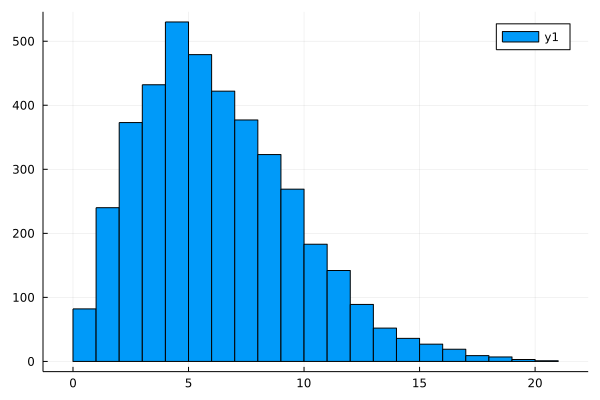

In [7]:


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)*length(EigA)

histogram(m)

 

In [8]:
mean(m)

6.282175075490522